# Question 1


<StemContainer object of 3 artists>

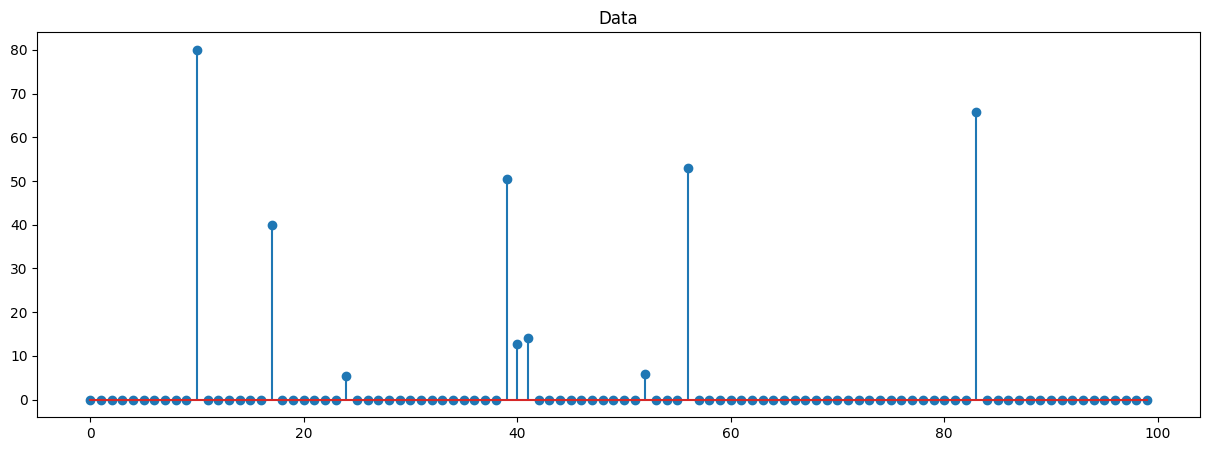

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def generate_signal(signal_length, num_nonzero):
    
    signal = np.zeros(signal_length)
    nonzero_indices = np.random.choice(signal_length, num_nonzero, replace=False)
    nonzero_values = 50*np.random.randn(num_nonzero)  
    signal[nonzero_indices] = nonzero_values
    return signal

signal_length = 100  # Total length of the signal
num_nonzero = 10    # Number of non-zero elements in the signal
your_index_no=200397 # Enter without english letter and without leading zeros
signal = generate_signal(signal_length, num_nonzero)
signal[10] = (your_index_no % 10)*10 + 10
if  your_index_no % 10 == 0:
  signal[10] = np.random.randn(1) + 30


signal=signal.reshape(signal_length,1)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.title("Data")
plt.stem(signal)


## Normalization using sklearn

In [28]:
import numpy as np
from sklearn.preprocessing import MaxAbsScaler
max_abs_scaler = MaxAbsScaler()

signal_1 = max_abs_scaler.fit_transform(signal)  # This is the Maxabs scaler 


## Defining MinMaxScaler and Standard scaler functions

In [64]:
def min_max_scale_function(data):
    min_val = np.min(data)
    max_val = np.max(data)
    data = (data-min_val)/(max_val-min_val)
    return data

def standard_scaler_function(data):
    miu = np.mean(data)
    stdiv = np.std(data)
    return (data-miu)/stdiv

signal_2 = min_max_scale_function(signal) 
signal_3 = standard_scaler_function(signal)


-0.04648285308209239 80.0


## Visualize Data


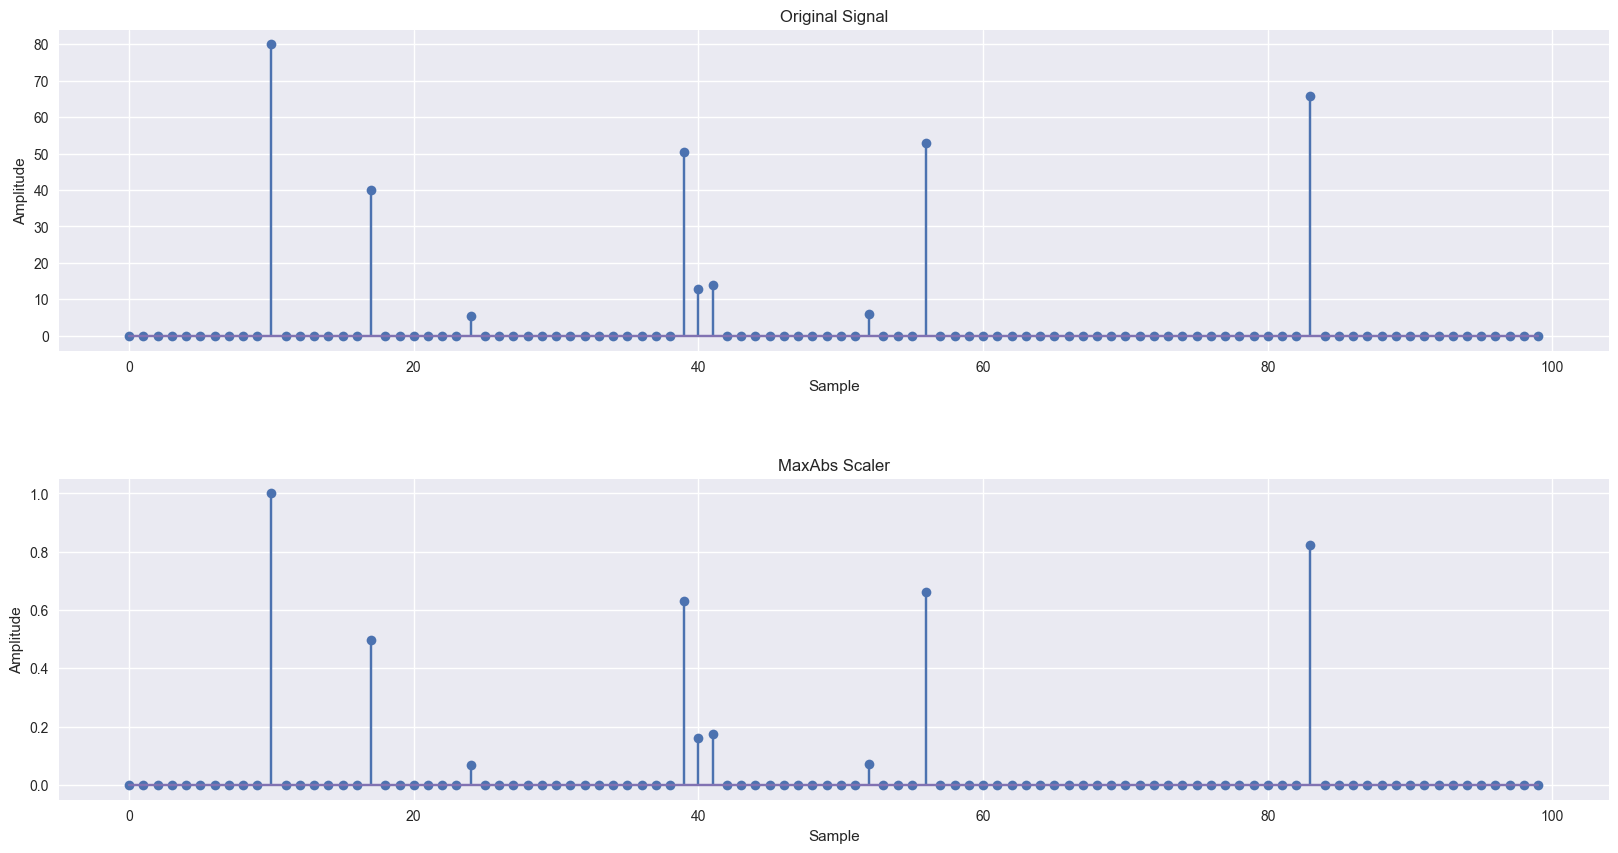

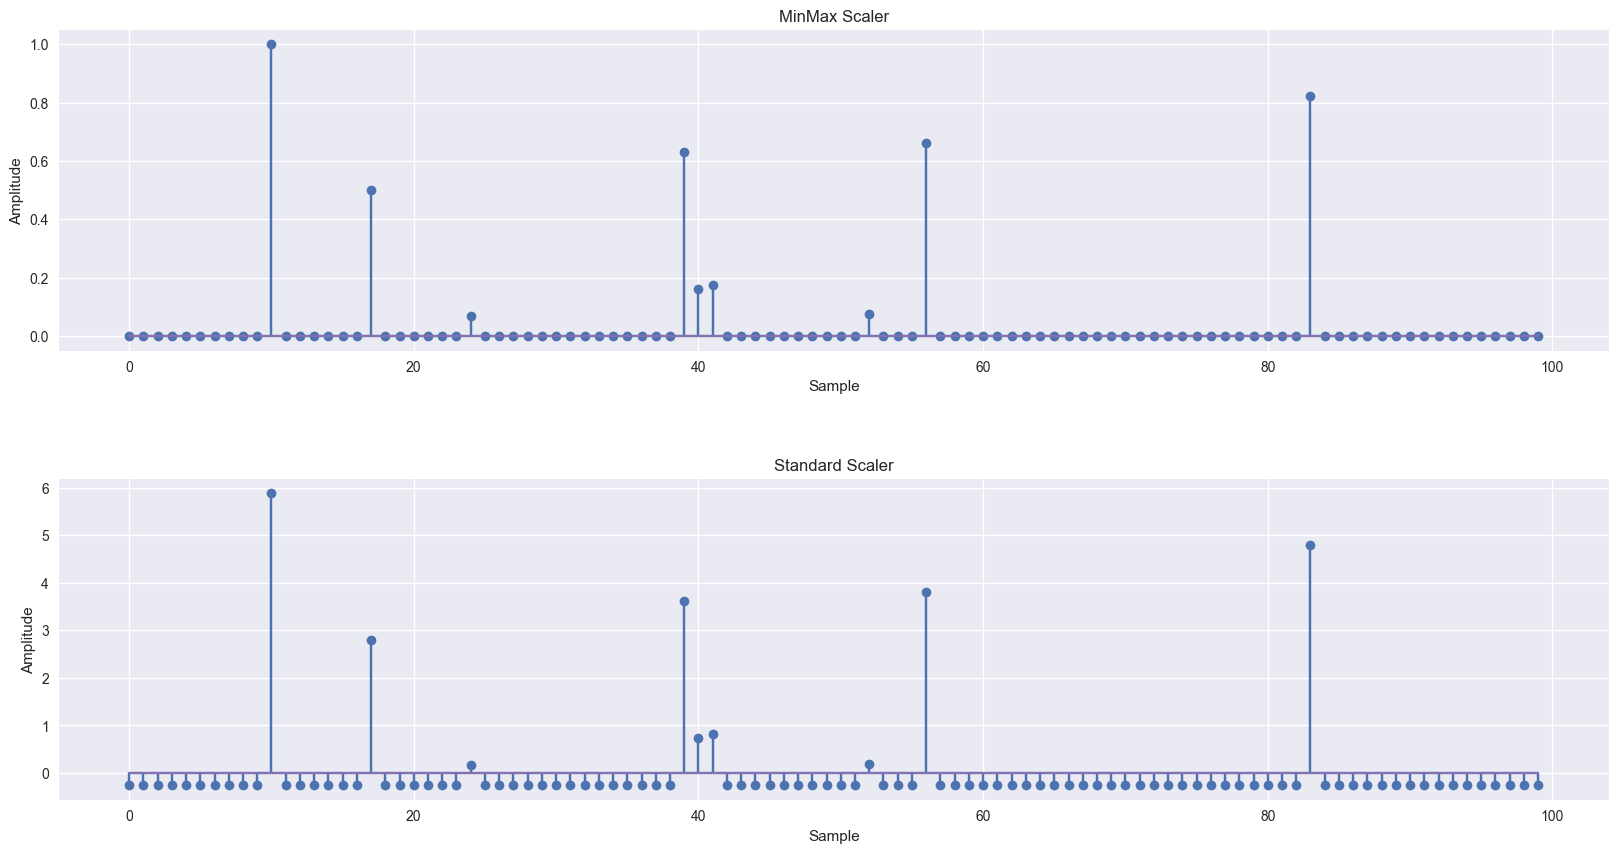

In [63]:
%matplotlib inline
# Plot Stem Plots
fig,ax = plt.subplots(2,1,figsize=(20,10))
#adjust the gap between subplots
plt.subplots_adjust(hspace = 0.4)
plt.style.use('seaborn-v0_8')

# Original Signal
ax[0].stem(signal)
ax[0].set_title('Original Signal')
ax[0].set_xlabel('Sample')
ax[0].set_ylabel('Amplitude')

# MaxAbs Scaler
ax[1].stem(signal_1)
ax[1].set_title('MaxAbs Scaler')
ax[1].set_xlabel('Sample')
ax[1].set_ylabel('Amplitude')
plt.show()

fig,ax = plt.subplots(2,1,figsize=(20,10))
#adjust the gap between subplots
plt.subplots_adjust(hspace = 0.4)
plt.style.use('seaborn-v0_8')

# MinMax Scaler
ax[0].stem(signal_2)
ax[0].set_title('MinMax Scaler')
ax[0].set_xlabel('Sample')
ax[0].set_ylabel('Amplitude')

#Standard Scaler
ax[1].stem(signal_3)
ax[1].set_title('Standard Scaler')
ax[1].set_xlabel('Sample')
ax[1].set_ylabel('Amplitude')

plt.show()




#### finding Non Zero values before and after normalization

In [70]:
print("Non Zero Elements of the Signal (Before Normalization): ",np.count_nonzero(signal),sep='\t')
print("Non Zero Elements of the Signal (After MaxAbs Normalization): ",np.count_nonzero(signal_1),sep='\t')
print("Non Zero Elements of the Signal (After MinMax Normalization): ",np.count_nonzero(signal_2),sep='\t')
print("Non Zero Elements of the Signal (After Standard Normalization): ",np.count_nonzero(signal_3))



Non Zero Elements of the Signal (Before Normalization): 	10
Non Zero Elements of the Signal (After MaxAbs Normalization): 	10
Non Zero Elements of the Signal (After MinMax Normalization): 	99
Non Zero Elements of the Signal (After Standard Normalization):  100


# Question 2